In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import pandas as pd
import io

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from google.colab import files
uploaded = files.upload()


Saving spotify_songs.csv to spotify_songs.csv


In [ ]:
df = pd.read_csv('spotify_songs.csv')
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

Data Cleaning

In [ ]:
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [ ]:
# Drop rows/columns with missing values
df = df.dropna()
print(df)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


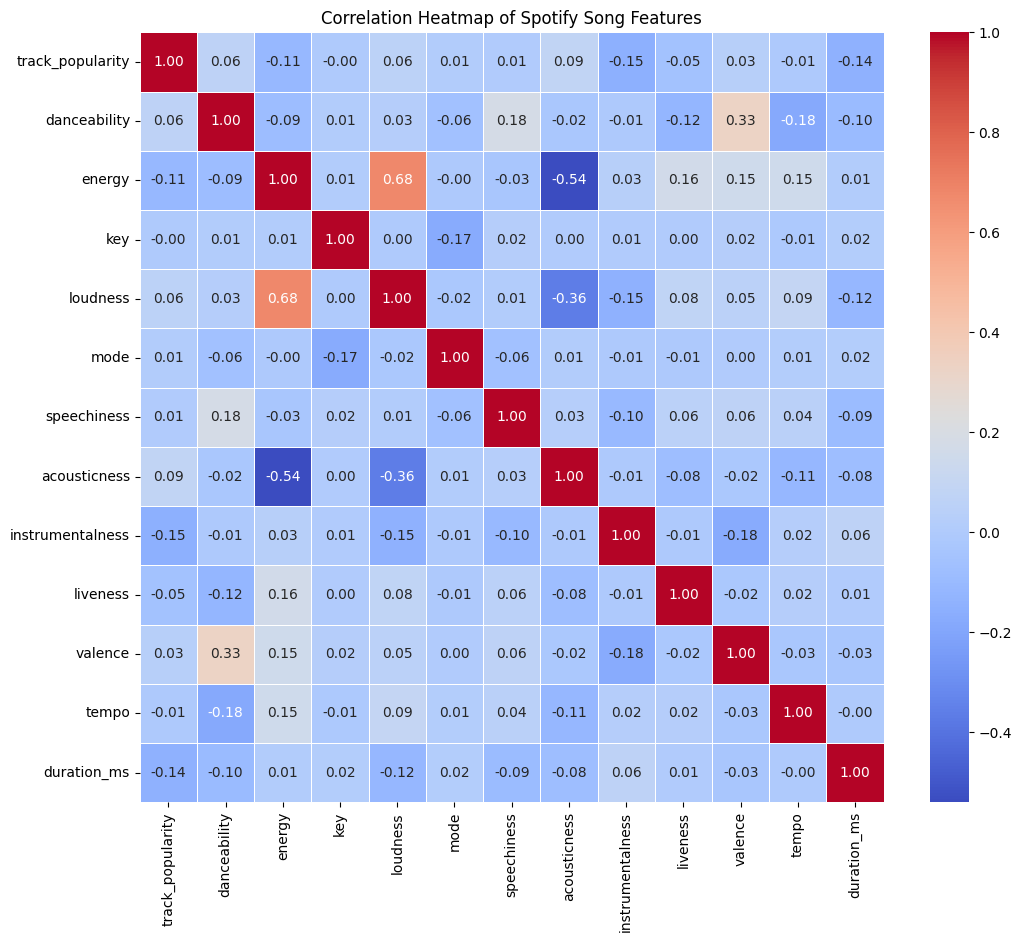

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all variables to include in the heatmap
features = [
    'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Spotify Song Features")
plt.show()


In [ ]:
# Outlier adjust/data normalisation
for column in df.select_dtypes(include=[np.number]).columns:
    # IQR for outliers
    q75, q25 = np.percentile(df[column], [75, 25])
    IQR = q75 - q25
    upper_limit = q75 + 3.0 * IQR
    lower_limit = q25 - 3.0 * IQR

    # Replace outliers with the mean of the feature
    mean_value = df[column].mean()
    df[column] = np.where(
        (df[column] > upper_limit) | (df[column] < lower_limit), mean_value, df[column]
    )

    # Check for NaNs after replacing outliers
    print(f"NaNs in {column} after outlier handling:", df[column].isnull().sum())

# Confirm no NaNs left
print("NaNs after outlier removal:", df.isnull().sum())

NaNs in track_popularity after outlier handling: 0
NaNs in danceability after outlier handling: 0
NaNs in energy after outlier handling: 0
NaNs in key after outlier handling: 0
NaNs in loudness after outlier handling: 0
NaNs in mode after outlier handling: 0
NaNs in speechiness after outlier handling: 0
NaNs in acousticness after outlier handling: 0
NaNs in instrumentalness after outlier handling: 0
NaNs in liveness after outlier handling: 0
NaNs in valence after outlier handling: 0
NaNs in tempo after outlier handling: 0
NaNs in duration_ms after outlier handling: 0
NaNs after outlier removal: track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key     

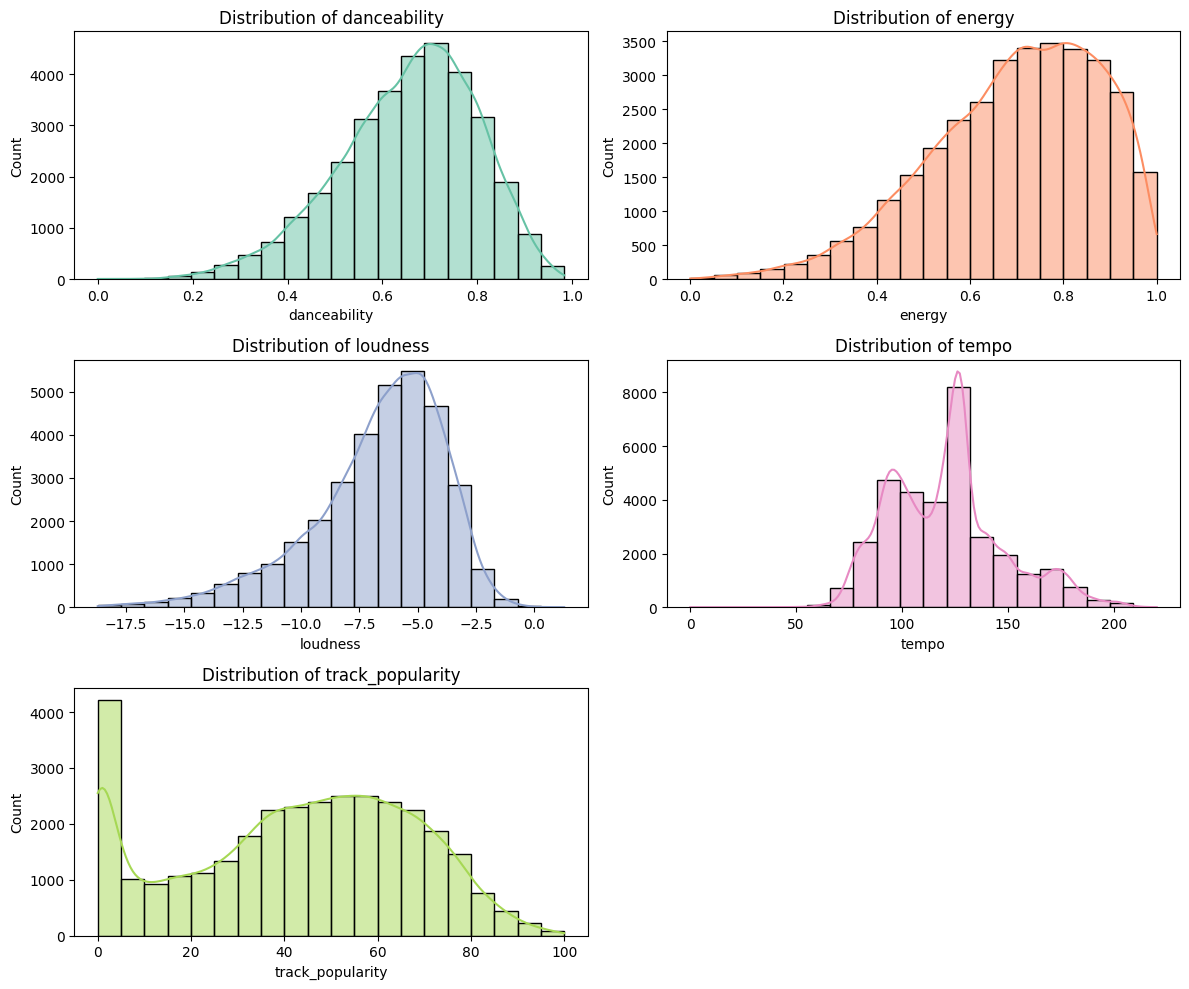

In [ ]:
features = ['danceability', 'energy', 'loudness', 'tempo', 'track_popularity']


plt.figure(figsize=(12, 10))


for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=20, color=sns.color_palette("Set2")[i-1])
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Data Pre-Processing

In [ ]:
X = df[['danceability', 'energy', 'loudness', 'tempo']]
y = df['track_popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save processed data
processed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test
}


Linear Regression

In [ ]:
# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 593.3028157110328
Linear Regression R²: 0.033541270875548035


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(feature_importance)

        Feature  Coefficient
2      loudness     5.902734
0  danceability     1.105347
3         tempo     0.513442
1        energy    -6.770101


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression MAE: 20.278440663631105
Linear Regression RMSE: 24.357808105636945


Random Forest

In [ ]:
# RANDOM FOREST REGRESSOR
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model Evaluation:')
print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R²: {r2_rf:.2f}')


Random Forest Model Evaluation:
MAE: 17.05
MSE: 474.22
RMSE: 21.78
R²: 0.23


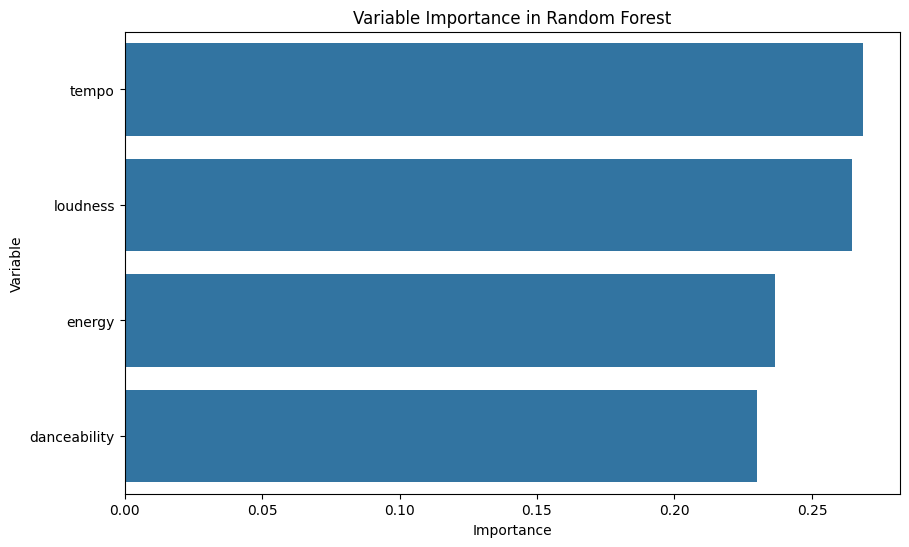

In [ ]:
importances = rf_model.feature_importances_
variable = X.columns
varImp_df = pd.DataFrame({'Variable': variable, 'Importance': importances})
varImp_df = varImp_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=varImp_df, x='Importance', y='Variable')
plt.title('Variable Importance in Random Forest')
plt.show()

XGBoost

XGBoost MSE: 550.2238912693788
XGBoost R² Score: 0.10371458530426025


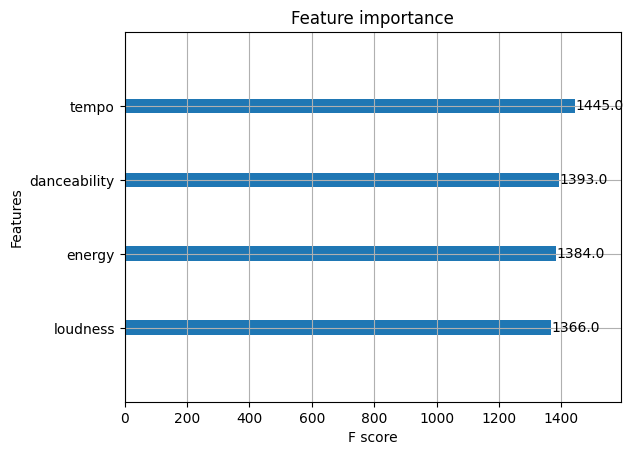

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#XGBoost regressor model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse}")
print(f"XGBoost R² Score: {r2}")

import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model)
plt.show()